In [1]:
from matplotlib import pyplot as plt
import numpy as np
import cv2 as cv
import os

In [5]:
IMAGES_LIST = sorted(os.listdir('Images'))
IMAGES_LIST = [os.path.join('Images', image) for image in IMAGES_LIST]
print(IMAGES_LIST[0])

Images/DSC_0101_18.jpg


(4000, 6000)


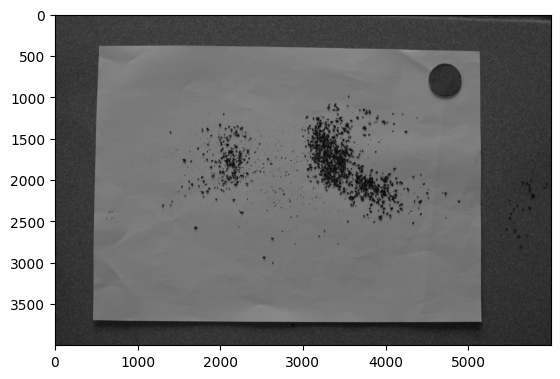

In [307]:
idx = -1
c_img = cv.imread(IMAGES_LIST[idx])
img = cv.cvtColor(c_img, cv.COLOR_BGR2GRAY)
print(img.shape)
plt.imshow(img, cmap='gray')

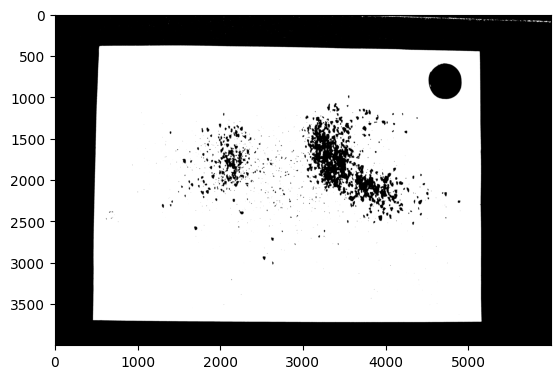

In [308]:
# Threshold
_, th = cv.threshold(img, 0, 255, cv.THRESH_BINARY + cv.THRESH_OTSU)
plt.imshow(th, cmap='gray')

In [309]:
# Contours
contours, _ = cv.findContours(
    th, cv.RETR_TREE, cv.CHAIN_APPROX_SIMPLE
)
for i, contour in enumerate(contours):
    if i == 0: continue
    
    # Approximate polygon
    approx = cv.approxPolyDP(contour, 0.01 * cv.arcLength(contour, True), True)
    if len(approx) == 4:
        area = cv.contourArea(contour)
        if area > 3000:
            print(cv.contourArea(contour))
            print(approx)
            break

15409897.0
[[[ 536  390]]

 [[ 459 3698]]

 [[5148 3715]]

 [[5125  451]]]


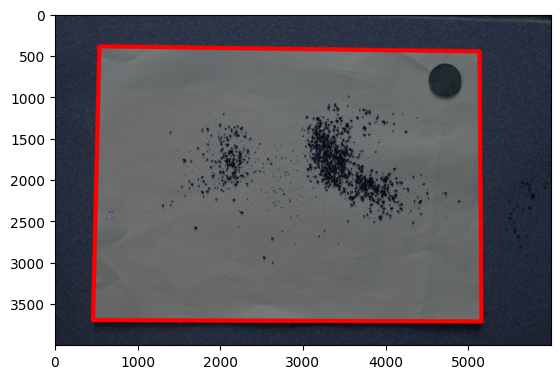

In [310]:
new_img = cv.drawContours(c_img.copy(), [approx], 0, (255, 0, 0), 50)
plt.imshow(new_img)

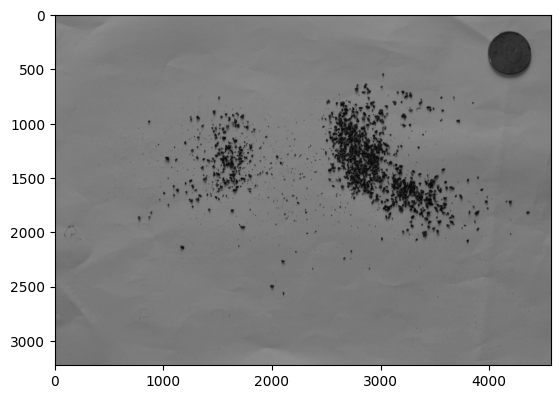

In [311]:
x, y, w, h = cv.boundingRect(approx)
cropped_img = img.copy()[y+50:y+h-50, x+70:x+w-50]
plt.imshow(cropped_img, cmap='gray')

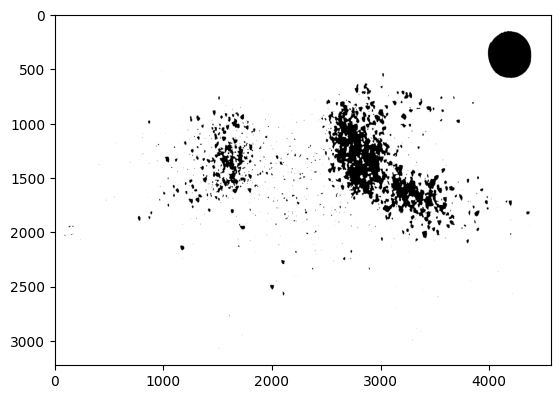

In [312]:
# New threshold
_, new_th = cv.threshold(cropped_img, 0, 255, cv.THRESH_BINARY + cv.THRESH_OTSU)
new_th = cv.morphologyEx(new_th, cv.MORPH_OPEN, np.ones((7, 7), np.uint8))
plt.imshow(new_th, cmap='gray')

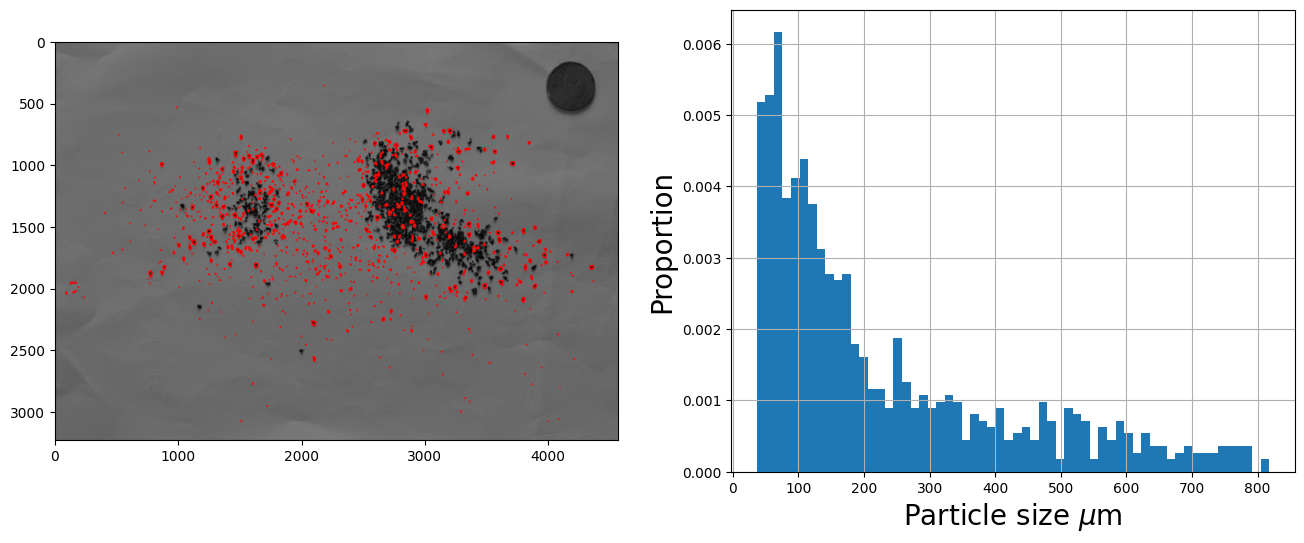

In [313]:
th_contours, _ = cv.findContours(
    new_th, cv.RETR_TREE, cv.CHAIN_APPROX_SIMPLE
)
new_c_img = cv.cvtColor(cropped_img, cv.COLOR_GRAY2RGB)
areas = []
full_areas = []
coin_area = np.pi * (26000//2)**2  
for i, contour in enumerate(th_contours):
    if i == 0: continue
    area = cv.contourArea(contour)
    full_areas.append(area)
    if (area > 1) and (area < 1000):
        cv.drawContours(new_c_img, [contour], 0, (255, 0, 0), 10)
        areas.append(cv.contourArea(contour))
fig, ax = plt.subplots(1, 2, figsize=(16, 6))
areas = np.sort(np.array(areas)) / np.max(full_areas)
diameters = ((coin_area * areas)/np.pi)**.5

ax[0].imshow(new_c_img)
_ = ax[1].hist(diameters, density=True, bins=60)
ax[1].set_xlabel(r'Particle size $\mu\mathrm{m}$', fontsize=20)
ax[1].set_ylabel('Proportion', fontsize=20)
ax[1].grid()